In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('movie_dataset.csv')

In [3]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [5]:
features = ['genres', 'keywords', 'cast', 'director']

In [6]:
df.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

<AxesSubplot:>

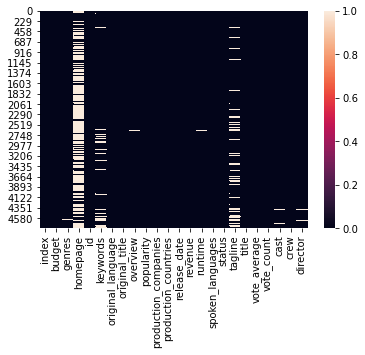

In [7]:
sns.heatmap(df.isnull())

In [8]:
for feature in features:
    df[feature].fillna(' ', inplace=True)

<AxesSubplot:>

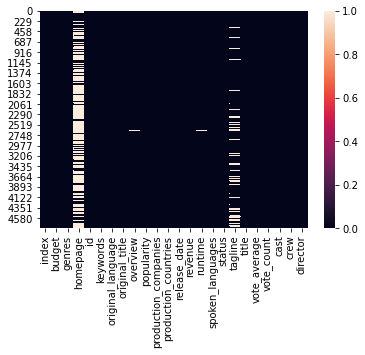

In [9]:
sns.heatmap(df.isnull())

In [10]:
def combineFeatures(row):
    return row['genres'] + " " + row['keywords'] + " " + row['cast'] + " "
    + row['director']

In [13]:
df['combined_features'] = df.apply(combineFeatures, axis=1)

In [14]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,combined_features
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,Action Adventure Fantasy Science Fiction cultu...
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,Adventure Fantasy Action ocean drug abuse exot...
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,Action Adventure Crime spy based on novel secr...
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,Action Crime Drama Thriller dc comics crime fi...
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,Action Adventure Science Fiction based on nove...


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
cv = CountVectorizer()

In [20]:
countMatrix = cv.fit_transform(df['combined_features'])
countMatrix

<4803x13366 sparse matrix of type '<class 'numpy.int64'>'
	with 88291 stored elements in Compressed Sparse Row format>

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

In [22]:
cosineSim = cosine_similarity(countMatrix)
cosineSim

array([[1.        , 0.11338934, 0.08728716, ..., 0.        , 0.        ,
        0.        ],
       [0.11338934, 1.        , 0.08247861, ..., 0.03940552, 0.        ,
        0.        ],
       [0.08728716, 0.08247861, 1.        , ..., 0.        , 0.06900656,
        0.        ],
       ...,
       [0.        , 0.03940552, 0.        , ..., 1.        , 0.        ,
        0.0521286 ],
       [0.        , 0.        , 0.06900656, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.0521286 , 0.        ,
        1.        ]])

In [23]:
cosineSim.shape

(4803, 4803)

In [24]:
cosineSim[0]

array([1.        , 0.11338934, 0.08728716, ..., 0.        , 0.        ,
       0.        ])

In [25]:
cosineSim[100]

array([0.04472136, 0.04225771, 0.        , ..., 0.09325048, 0.        ,
       0.        ])

In [31]:
def getIndex(title):
    return df[df['title'] == title]['index'].values[0]

getIndex("Spectre")

2

In [36]:
def getTitle(index):
    return df[df['index'] == index]['title'].values[0]

getTitle(100)

'The Curious Case of Benjamin Button'

In [56]:
movieUserLikes = input("Enter a movie you like: ")

Enter a movie you like: Avatar


In [57]:
movieIndex = getIndex(movieUserLikes)
movieIndex

0

In [58]:
cosineSim[movieIndex]

array([1.        , 0.11338934, 0.08728716, ..., 0.        , 0.        ,
       0.        ])

In [59]:
sorted(cosineSim[movieIndex], reverse=True)[1:]

[0.41702882811414965,
 0.3670651741928988,
 0.3670651741928988,
 0.3600000000000001,
 0.3336230624913197,
 0.31378581622109447,
 0.30792014356780045,
 0.3055050463303894,
 0.30237157840738177,
 0.30000000000000004,
 0.2984810028978546,
 0.2984810028978546,
 0.2984810028978546,
 0.2919201796799047,
 0.2919201796799047,
 0.2857738033247042,
 0.28,
 0.2694301256218254,
 0.2683281572999748,
 0.2618614682831909,
 0.2618614682831909,
 0.2618614682831909,
 0.2618614682831909,
 0.2618614682831909,
 0.25584085962673253,
 0.25584085962673253,
 0.25584085962673253,
 0.25021729686848976,
 0.25021729686848976,
 0.25021729686848976,
 0.25021729686848976,
 0.25,
 0.24494897427831788,
 0.24494897427831788,
 0.24494897427831785,
 0.24494897427831785,
 0.24494897427831785,
 0.24494897427831785,
 0.24253562503633297,
 0.24000000000000005,
 0.24,
 0.23533936216582085,
 0.23094010767585033,
 0.23094010767585033,
 0.22941573387056174,
 0.22941573387056174,
 0.22677868380553634,
 0.223606797749979,
 0.223606

In [60]:
myList = [10, 20, 30]
list(enumerate(myList))

[(0, 10), (1, 20), (2, 30)]

In [61]:
similarMovies = list(enumerate(cosineSim[movieIndex]))
similarMovies

[(0, 1.0000000000000004),
 (1, 0.11338934190276817),
 (2, 0.08728715609439697),
 (3, 0.04082482904638631),
 (4, 0.25021729686848976),
 (5, 0.12510864843424488),
 (6, 0.0),
 (7, 0.15118578920369088),
 (8, 0.08944271909999159),
 (9, 0.12792042981336627),
 (10, 0.2085144140570748),
 (11, 0.08340576562282992),
 (12, 0.13093073414159545),
 (13, 0.08340576562282992),
 (14, 0.19611613513818404),
 (15, 0.08164965809277262),
 (16, 0.1485562705416415),
 (17, 0.1341640786499874),
 (18, 0.15118578920369088),
 (19, 0.1341640786499874),
 (20, 0.12792042981336627),
 (21, 0.08528028654224418),
 (22, 0.09701425001453319),
 (23, 0.14142135623730953),
 (24, 0.07302967433402215),
 (25, 0.0),
 (26, 0.24494897427831785),
 (27, 0.17056057308448835),
 (28, 0.17056057308448835),
 (29, 0.08944271909999159),
 (30, 0.12247448713915893),
 (31, 0.2085144140570748),
 (32, 0.11766968108291043),
 (33, 0.15689290811054724),
 (34, 0.0),
 (35, 0.1835325870964494),
 (36, 0.17056057308448835),
 (37, 0.14142135623730953),
 

In [62]:
sortedMovies = sorted(similarMovies, key=lambda x : x[1], reverse=True)[1:]
sortedMovies

[(94, 0.41702882811414965),
 (47, 0.3670651741928988),
 (56, 0.3670651741928988),
 (3158, 0.3600000000000001),
 (3208, 0.3336230624913197),
 (278, 0.31378581622109447),
 (1531, 0.30792014356780045),
 (1053, 0.3055050463303894),
 (239, 0.30237157840738177),
 (4401, 0.30000000000000004),
 (61, 0.2984810028978546),
 (838, 0.2984810028978546),
 (2403, 0.2984810028978546),
 (2696, 0.2919201796799047),
 (4332, 0.2919201796799047),
 (661, 0.2857738033247042),
 (3730, 0.28),
 (1650, 0.2694301256218254),
 (1083, 0.2683281572999748),
 (158, 0.2618614682831909),
 (228, 0.2618614682831909),
 (322, 0.2618614682831909),
 (539, 0.2618614682831909),
 (2198, 0.2618614682831909),
 (577, 0.25584085962673253),
 (581, 0.25584085962673253),
 (1990, 0.25584085962673253),
 (4, 0.25021729686848976),
 (232, 0.25021729686848976),
 (2129, 0.25021729686848976),
 (3184, 0.25021729686848976),
 (1259, 0.25),
 (541, 0.24494897427831788),
 (2444, 0.24494897427831788),
 (26, 0.24494897427831785),
 (300, 0.24494897427831

In [63]:
i = 0

for movie in sortedMovies:
    print(getTitle(movie[0]))
    i += 1
    
    if i == 10:
        break

Guardians of the Galaxy
Star Trek Into Darkness
Star Trek Beyond
Alien
Star Wars: Clone Wars: Volume 1
Planet of the Apes
Moonraker
Galaxy Quest
Gravity
The Helix... Loaded
